In [1]:
from fastdtw import dtw
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = np.load("../resources/features/train/1_0/Flares.npy")
test_50 = np.load("../resources/features/test/50/1_0/Flares.npy")
test_100 = np.load("../resources/features/test/100/1_0/Flares.npy")

distance_50, path_50 = dtw(train, test_50)
distance_100, path_100 = dtw(train, test_100)

In [3]:
def vis_path(path, title: str = ""):
  x = [point[0] for point in path]
  y = [point[1] for point in path]
  plt.figure(figsize=(10, 6))
  plt.plot(x, y, marker='o', linestyle='-', color='b', label='DTW Path')
  plt.title(f'Visualization of DTW Path ({title})')
  plt.xlabel('Train')
  plt.ylabel('Test')
  plt.legend()
  plt.grid(True)
  plt.show()

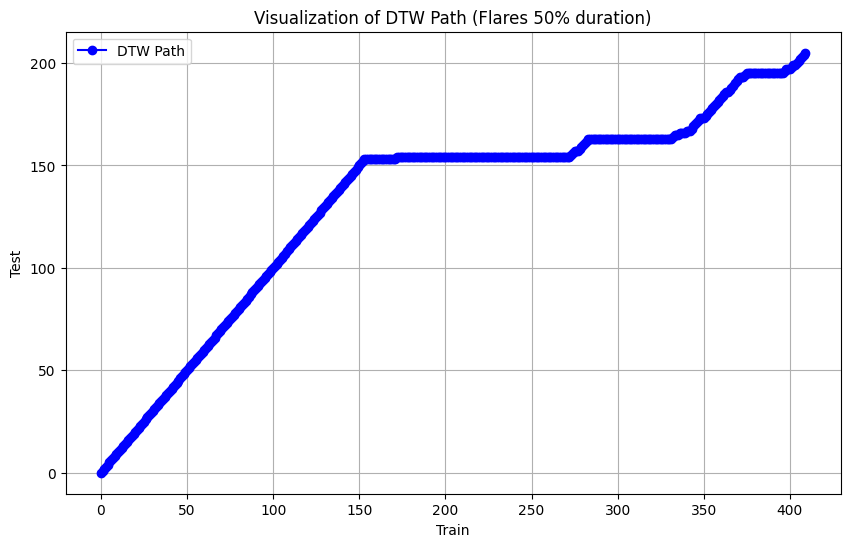

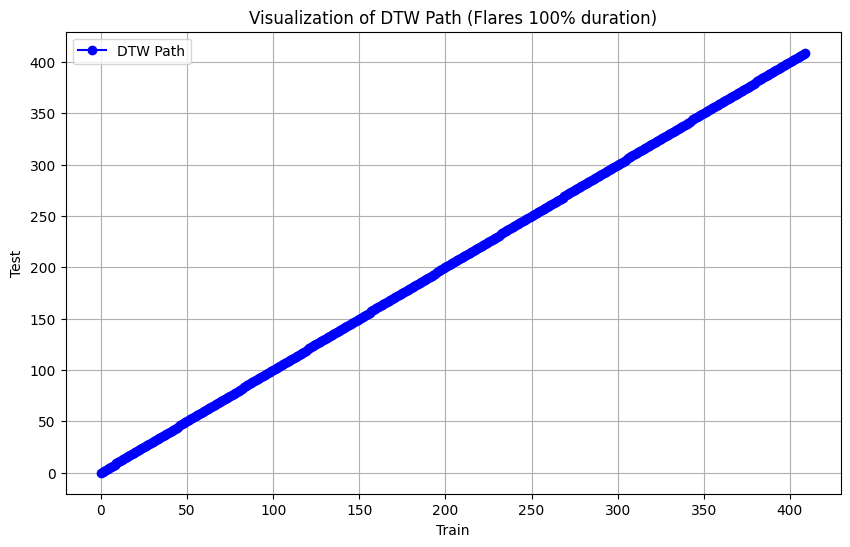

In [4]:
vis_path(path_50, "Flares 50% duration")
vis_path(path_100, "Flares 100% duration")


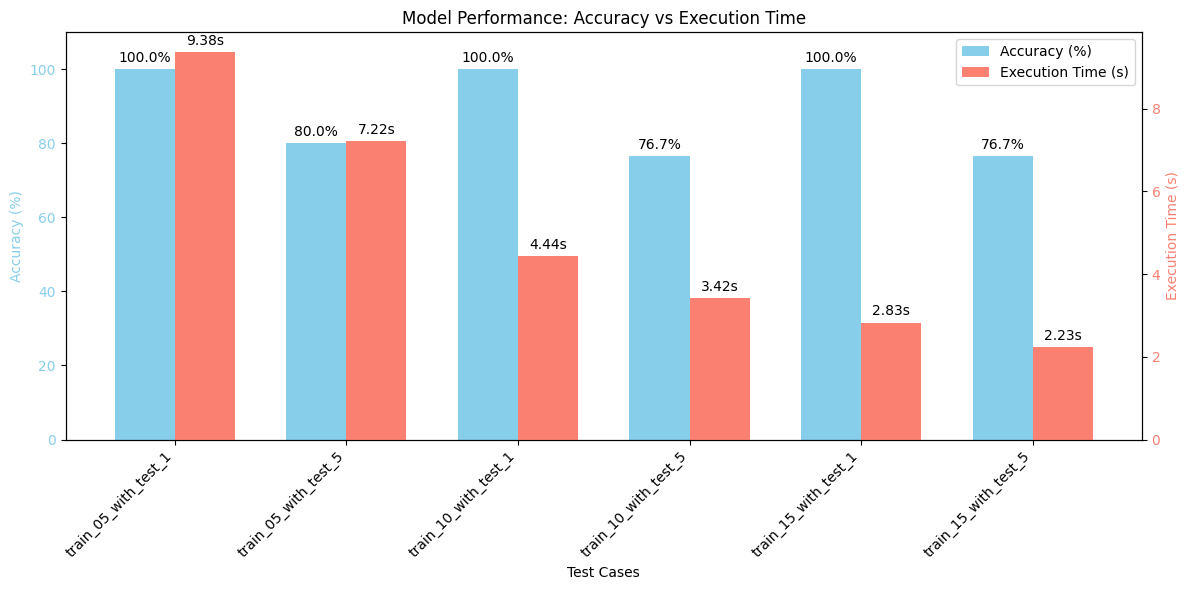

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
test_names = [
  "train_05_with_test_1",
  "train_05_with_test_5",
  "train_10_with_test_1",
  "train_10_with_test_5",
  "train_15_with_test_1",
  "train_15_with_test_5"
]
accuracy = [100.0, 80.0, 100.0, 76.67, 100.0, 76.67]
execution_time = [9.38, 7.22, 4.44, 3.42, 2.83, 2.23]

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar positions
x = np.arange(len(test_names))
width = 0.35

# Plot accuracy bars
bars1 = ax1.bar(x - width/2, accuracy, width, color='skyblue', label='Accuracy (%)')
ax1.set_ylabel('Accuracy (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(0, 110)  # Leave some space above 100%

# Create secondary axis for execution time
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, execution_time, width, color='salmon', label='Execution Time (s)')
ax2.set_ylabel('Execution Time (s)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Add labels, title, and legend
ax1.set_xlabel('Test Cases')
ax1.set_xticks(x)
ax1.set_xticklabels(test_names, rotation=45, ha='right')
plt.title('Model Performance: Accuracy vs Execution Time')

# Add value labels on top of bars
for bar in bars1:
  height = bar.get_height()
  ax1.annotate(f'{height:.1f}%',
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3),  # 3 points vertical offset
               textcoords="offset points",
               ha='center', va='bottom')

for bar in bars2:
  height = bar.get_height()
  ax2.annotate(f'{height:.2f}s',
               xy=(bar.get_x() + bar.get_width() / 2, height),
               xytext=(0, 3),  # 3 points vertical offset
               textcoords="offset points",
               ha='center', va='bottom')

# Add combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()